<a href="https://www.kaggle.com/code/shubhamgupta012/different-jobs-analysis?scriptVersionId=134932533" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-jobs-comprehensive-dataset/data_science_job.csv


In [2]:
df = pd.read_csv('/kaggle/input/data-science-jobs-comprehensive-dataset/data_science_job.csv',encoding='latin-1')
df.head()

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48K+ *,"Computer Science,Data quality,Genetics,Mathema...",",,,,"
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48K+ *,"Agile,Data management,Finance,Security,,",",,,,"
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,NaN,90K+ *,"Agile,Architecture,AWS,Computer Science,Comput...","Career development,,,,"
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48K+ *,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,"
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108K+,"AWS,Azure,Computer Science,Consulting,Dataflow...","Flex hours,Flex vacation,Parental leave,Unlimi..."


In [3]:
df.shape

(3198, 8)

In [4]:
df.describe()

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
count,3197,3197,3197,3197,2962,3009,3198,3198
unique,1106,2138,1117,3,4,218,2600,777
top,Publicis Groupe,Data Engineer,"Bengaluru, India",Full Time,Senior-level,115K+ *,"Big Data,Business Intelligence,Data analysis,E...",",,,,"
freq,126,105,90,3116,1876,253,12,542


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Company                     3197 non-null   object
 1   Job Title                   3197 non-null   object
 2   Location                    3197 non-null   object
 3   Job Type                    3197 non-null   object
 4   Experience level            2962 non-null   object
 5   Salary                      3009 non-null   object
 6   Requirment of the company   3198 non-null   object
 7   Facilities                  3198 non-null   object
dtypes: object(8)
memory usage: 200.0+ KB


In [6]:
df.dtypes

Company                       object
Job Title                     object
Location                      object
Job Type                      object
Experience level              object
Salary                        object
Requirment of the company     object
Facilities                    object
dtype: object

In [7]:
df.isnull().sum()

Company                         1
Job Title                       1
Location                        1
Job Type                        1
Experience level              236
Salary                        189
Requirment of the company       0
Facilities                      0
dtype: int64

In [8]:
df.duplicated().sum()

202

In [9]:
df1 = df.dropna()

In [10]:
df1.isnull().sum()

Company                       0
Job Title                     0
Location                      0
Job Type                      0
Experience level              0
Salary                        0
Requirment of the company     0
Facilities                    0
dtype: int64

In [11]:
df1.duplicated().sum()

177

In [12]:
df1 = df1.drop_duplicates()

In [13]:
df1.duplicated().sum()

0

In [14]:
df1.head()

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48K+ *,"Computer Science,Data quality,Genetics,Mathema...",",,,,"
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48K+ *,"Agile,Data management,Finance,Security,,",",,,,"
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48K+ *,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,"
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108K+,"AWS,Azure,Computer Science,Consulting,Dataflow...","Flex hours,Flex vacation,Parental leave,Unlimi..."
5,ServiceNow,Sr Staff Data Scientist - ATG,"Kirkland, Washington, United States",Full Time,Senior-level,184K+,"Computer Science,Deep Learning,Industrial,Mach...","401(k) matching,Career development,Competitive..."


In [15]:
df1['Company'].value_counts()

Publicis Groupe                   102
Bosch Group                        70
Amazon.com                         53
Block                              44
Visa                               40
                                 ... 
Cleo AI Ltd                         1
ZFX                                 1
Aledade                             1
IXL Learning                        1
Galileo Financial Technologies      1
Name: Company, Length: 1006, dtype: int64

In [16]:
df1['Job Title'].value_counts()

Data Engineer                                         90
Data Scientist                                        72
Data Analyst                                          69
Senior Data Engineer                                  63
Machine Learning Engineer                             41
                                                      ..
Senior Data Scientist - Retailer                       1
Associate Director, Business Intelligence              1
Sr. Data Engineer - (Java + Spark)                     1
Staff Software Engineer - Streaming Data Pipelines     1
Data Scientist - New College Graduate                  1
Name: Job Title, Length: 1881, dtype: int64

In [17]:
df1['Job Type'].value_counts()

Full Time    2596
Part Time       4
Name: Job Type, dtype: int64

In [18]:
df1['Experience level'].value_counts()

Senior-level       1701
Mid-level           433
Entry-level         349
Executive-level     117
Name: Experience level, dtype: int64

In [19]:
df1['Salary'].value_counts()

 115K+ *    242
 62K+ *     200
 92K+ *     165
 129K+ *    157
 55K+ *     145
           ... 
 227K+        1
 111K+        1
 51K+         1
 83K+         1
 117K+        1
Name: Salary, Length: 214, dtype: int64

In [20]:
df['Location'].value_counts()

Bengaluru, India                             90
Paris, France                                79
New York City, United States                 69
Remote                                       67
London, United Kingdom                       64
                                             ..
Redwood City, USA & Vancouver, Canada & 
     1
Remote Canada | Remote United States          1
Toronto, ON                                   1
Mountain View, CA, United States              1
Biñan, Philippines                            1
Name: Location, Length: 1117, dtype: int64

<Axes: ylabel='Experience level'>

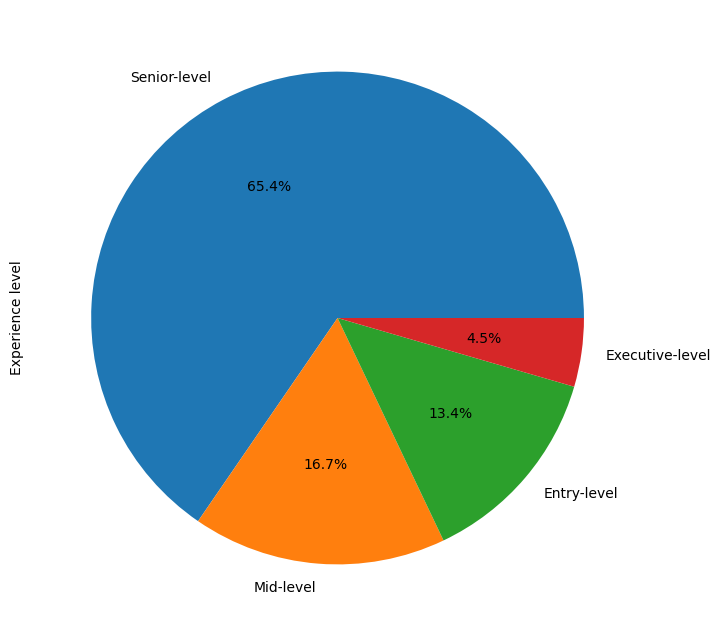

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
df1['Experience level'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='Job Type'>

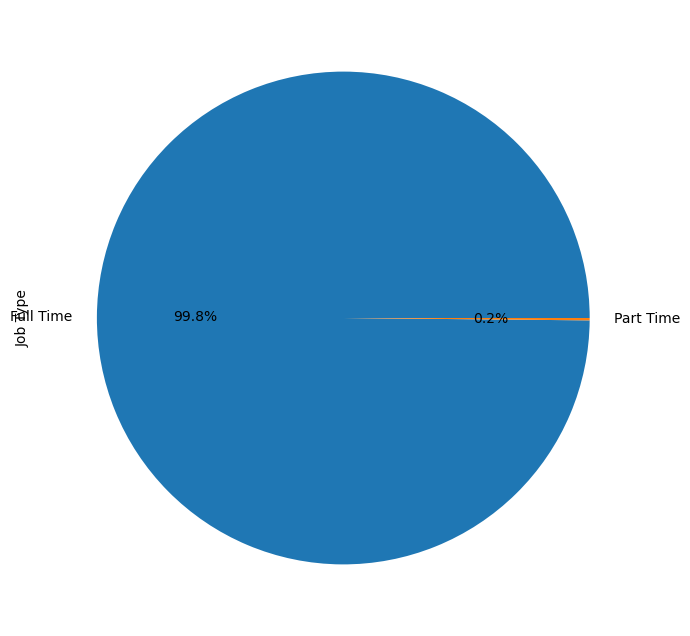

In [22]:
plt.figure(figsize=(20,8))
df1['Job Type'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='Company'>

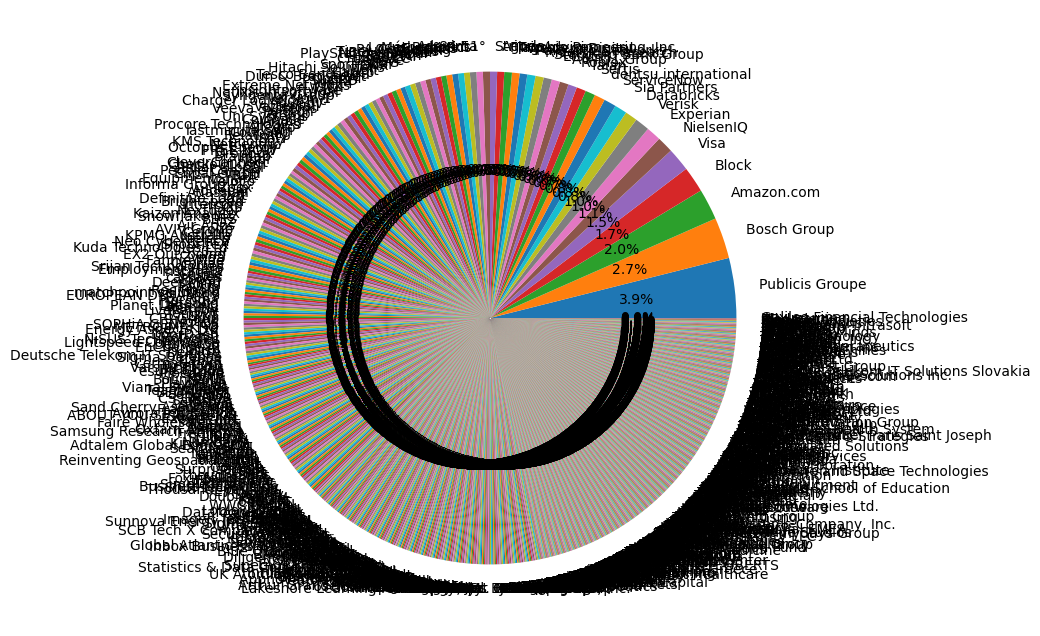

In [23]:
plt.figure(figsize=(20,8))
df1['Company'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='Job Title'>

/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 150 (\x96) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


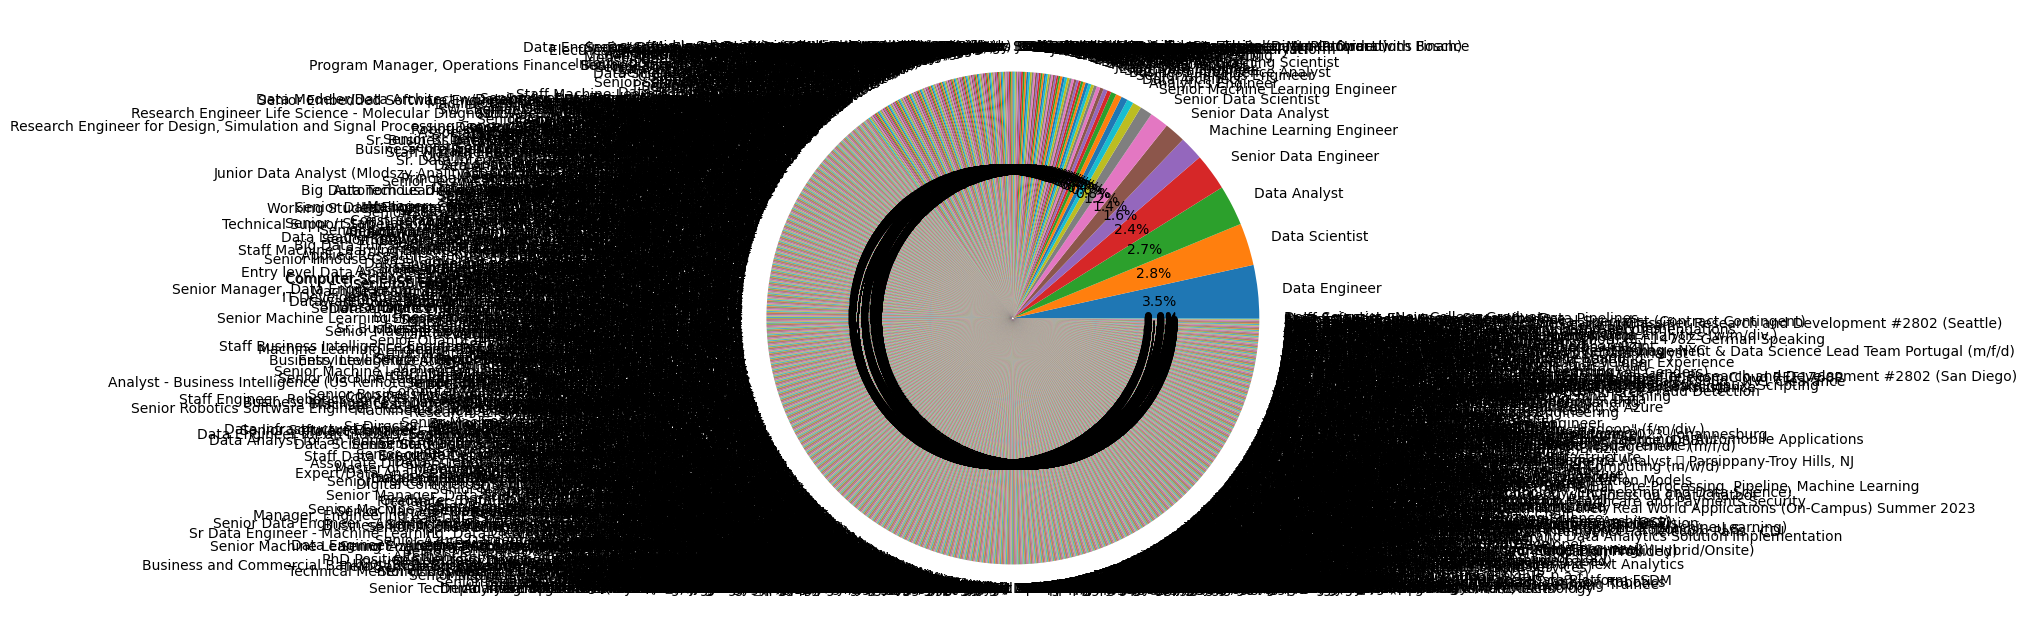

In [24]:
plt.figure(figsize=(20,8))
df1['Job Title'].value_counts().plot.pie(autopct='%1.1f%%')

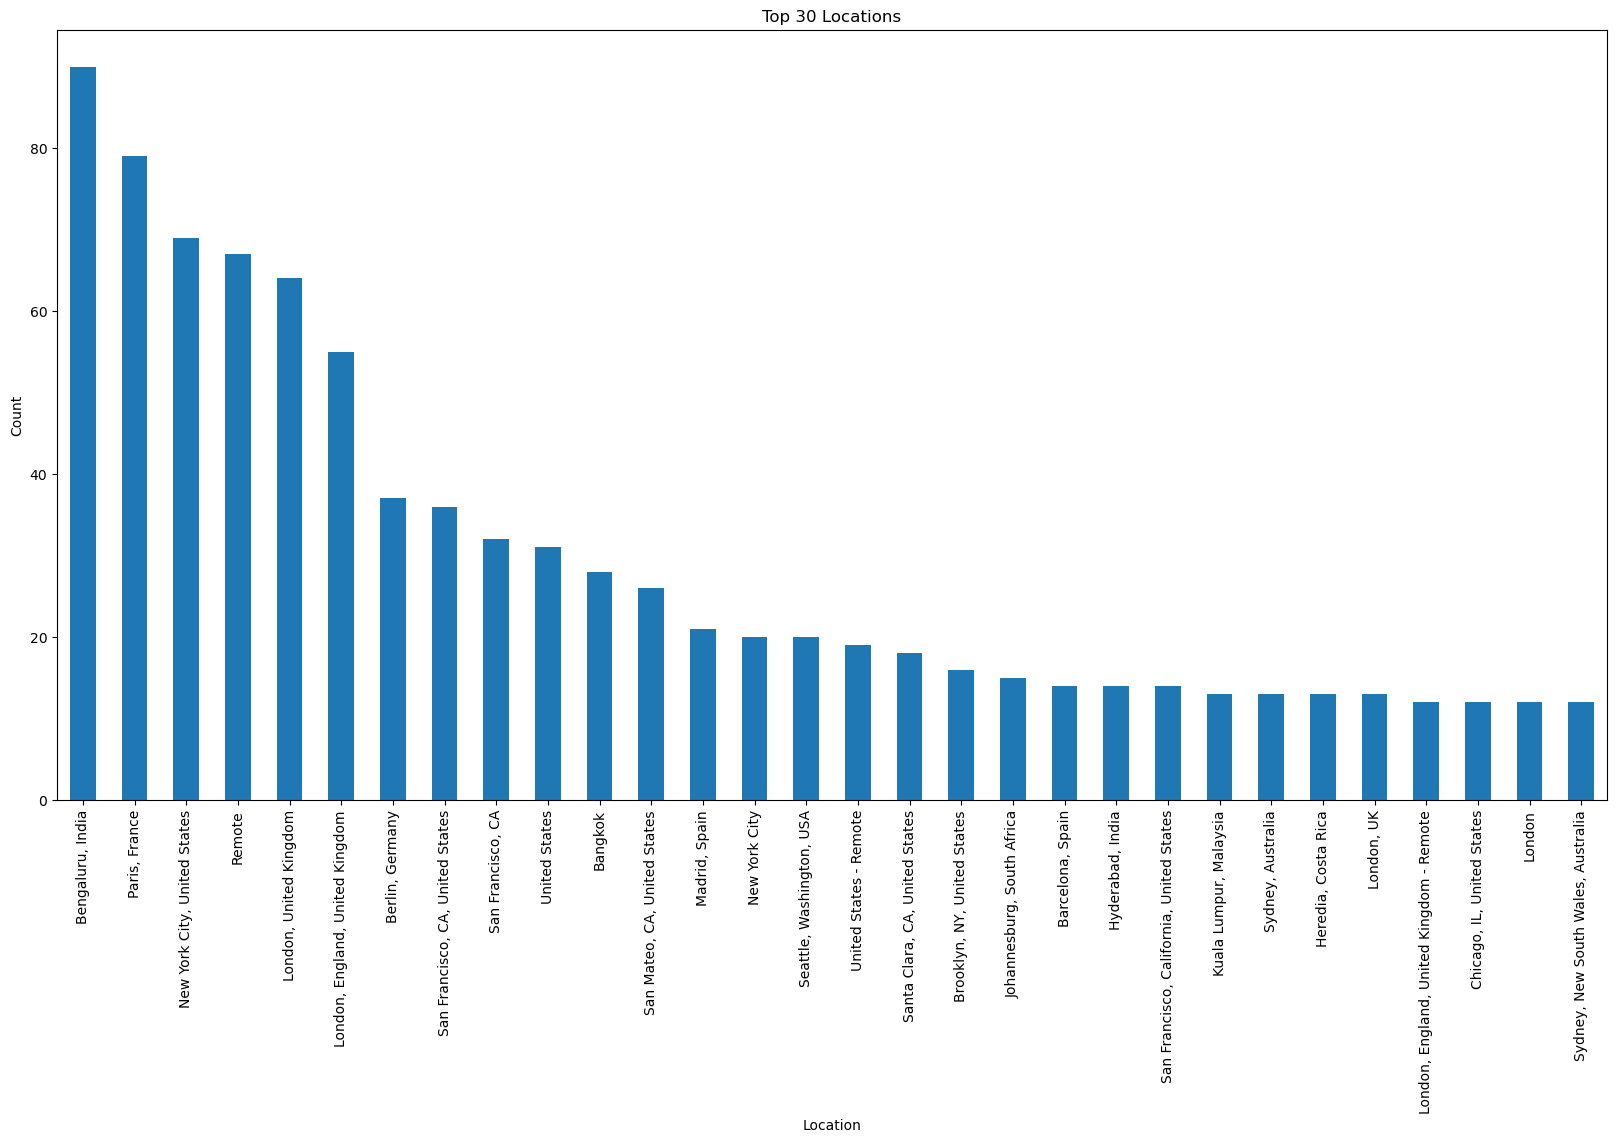

In [25]:
location_counts = df['Location'].value_counts().head(30)

# Plotting the bar graph
plt.figure(figsize=(20,10))
location_counts.plot(kind='bar')
plt.title('Top 30 Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


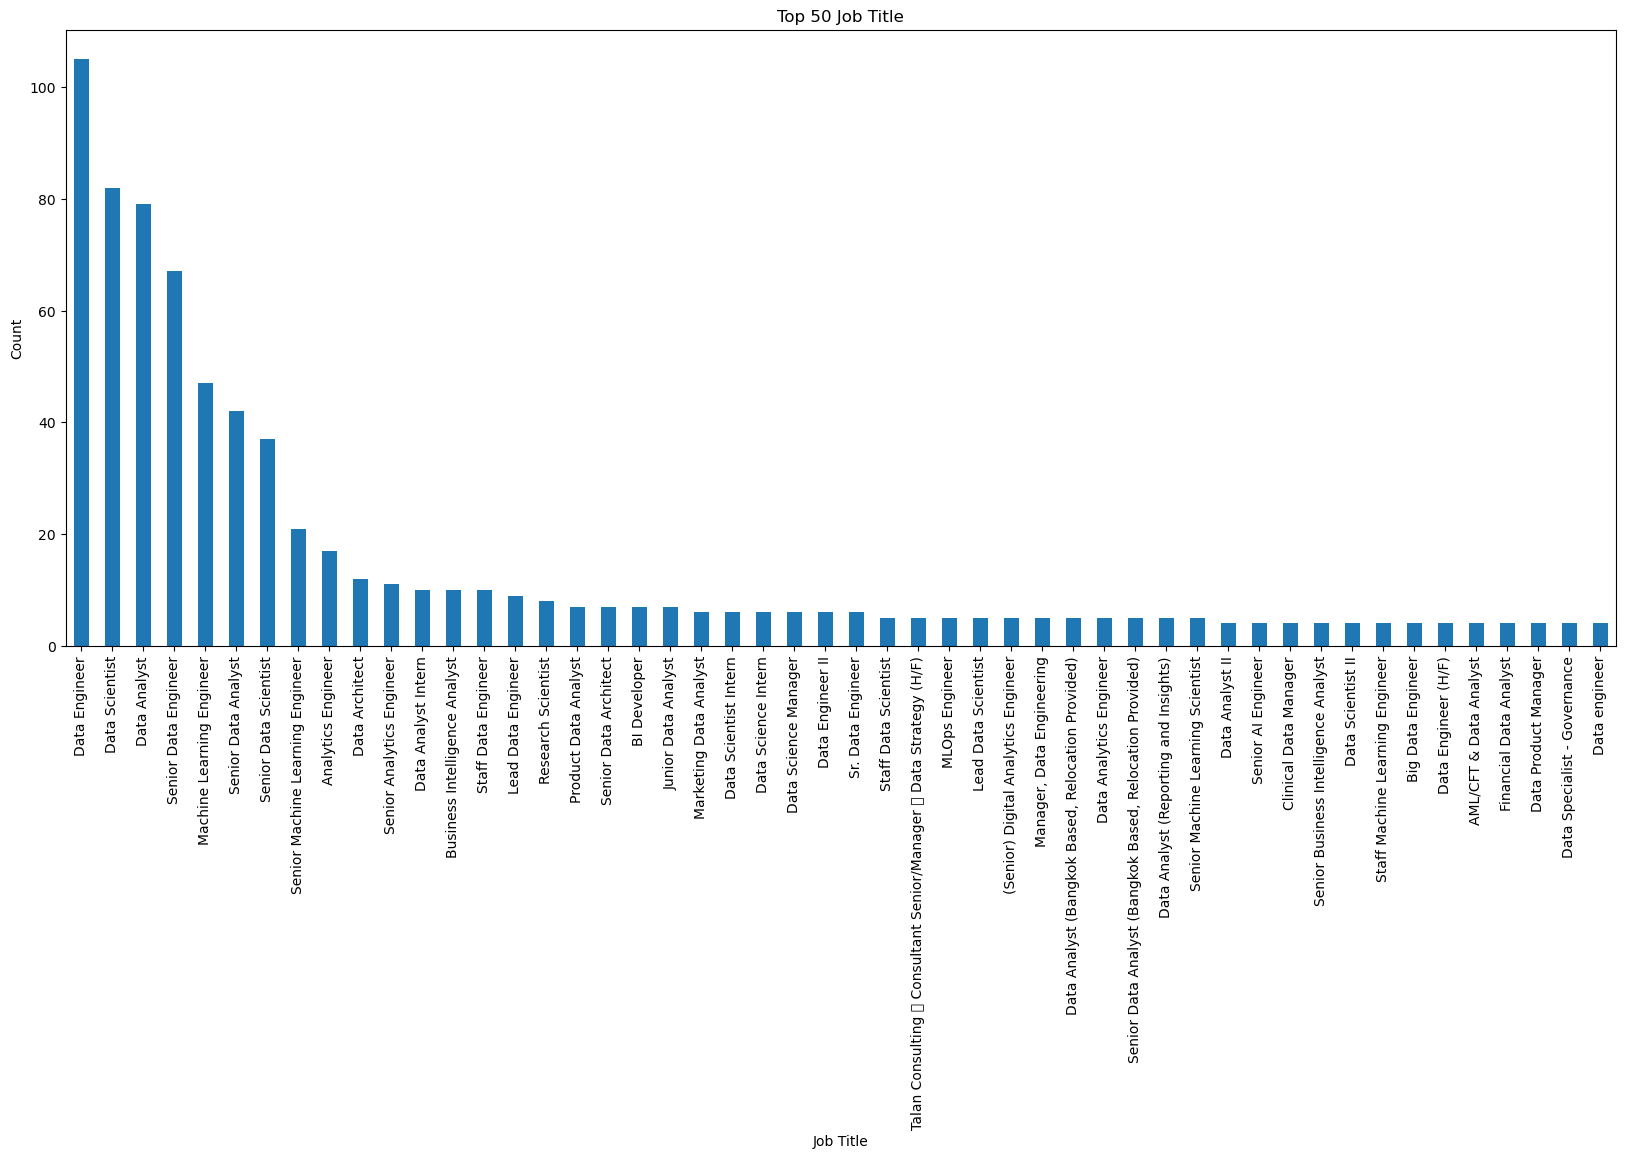

In [26]:
location_counts = df['Job Title'].value_counts().head(50)

# Plotting the bar graph
plt.figure(figsize=(20,8))
location_counts.plot(kind='bar')
plt.title('Top 50 Job Title')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

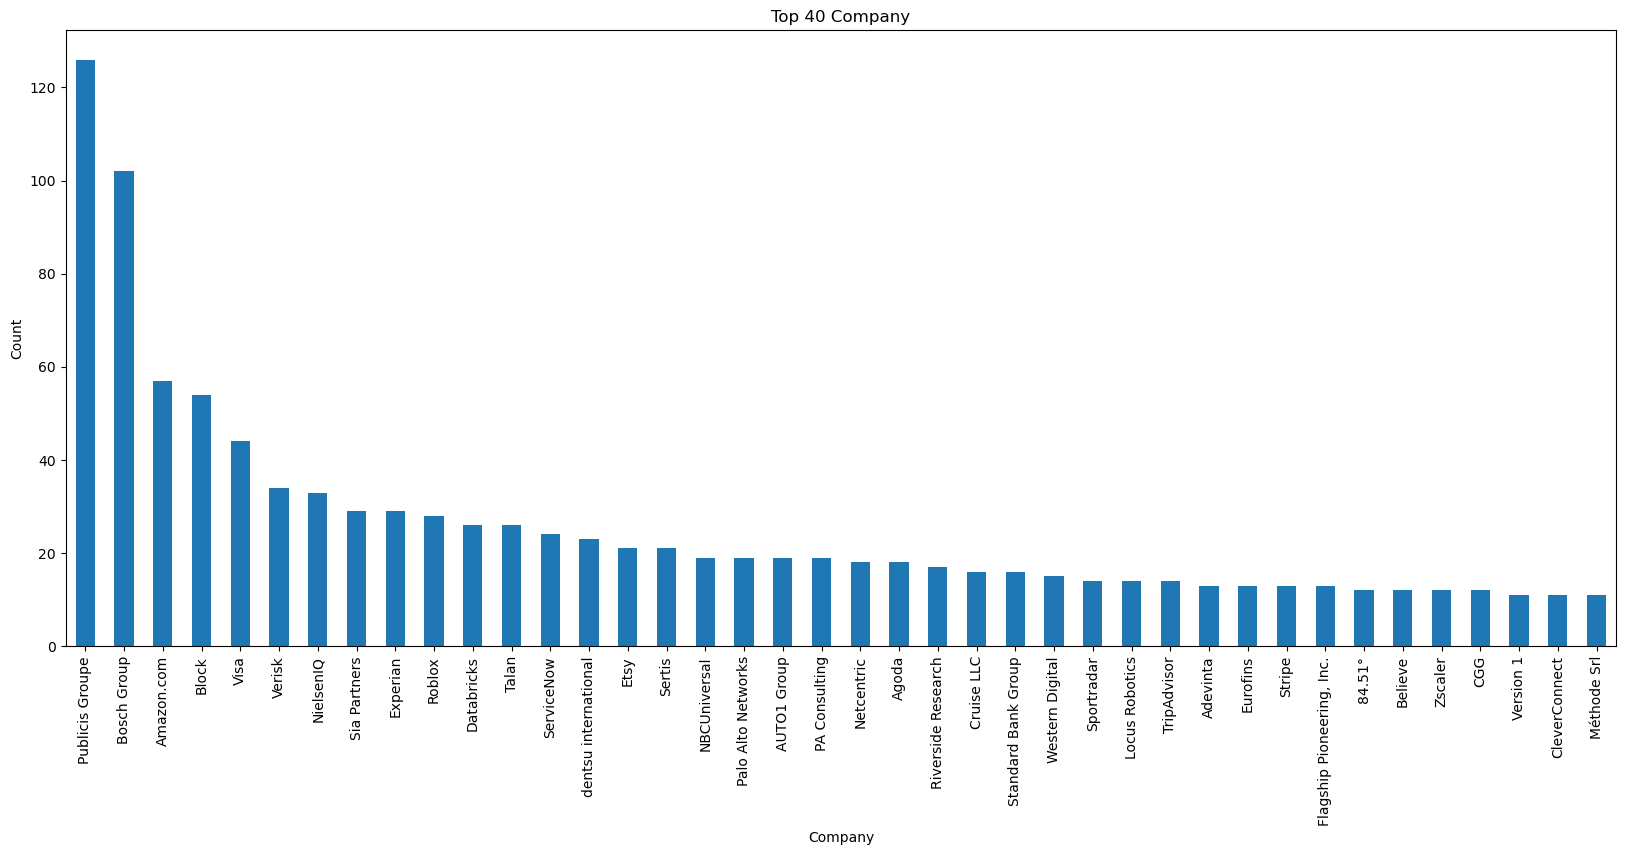

In [27]:
location_counts = df['Company'].value_counts().head(40)

# Plotting the bar graph
plt.figure(figsize=(20,8))
location_counts.plot(kind='bar')
plt.title('Top 40 Company')
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

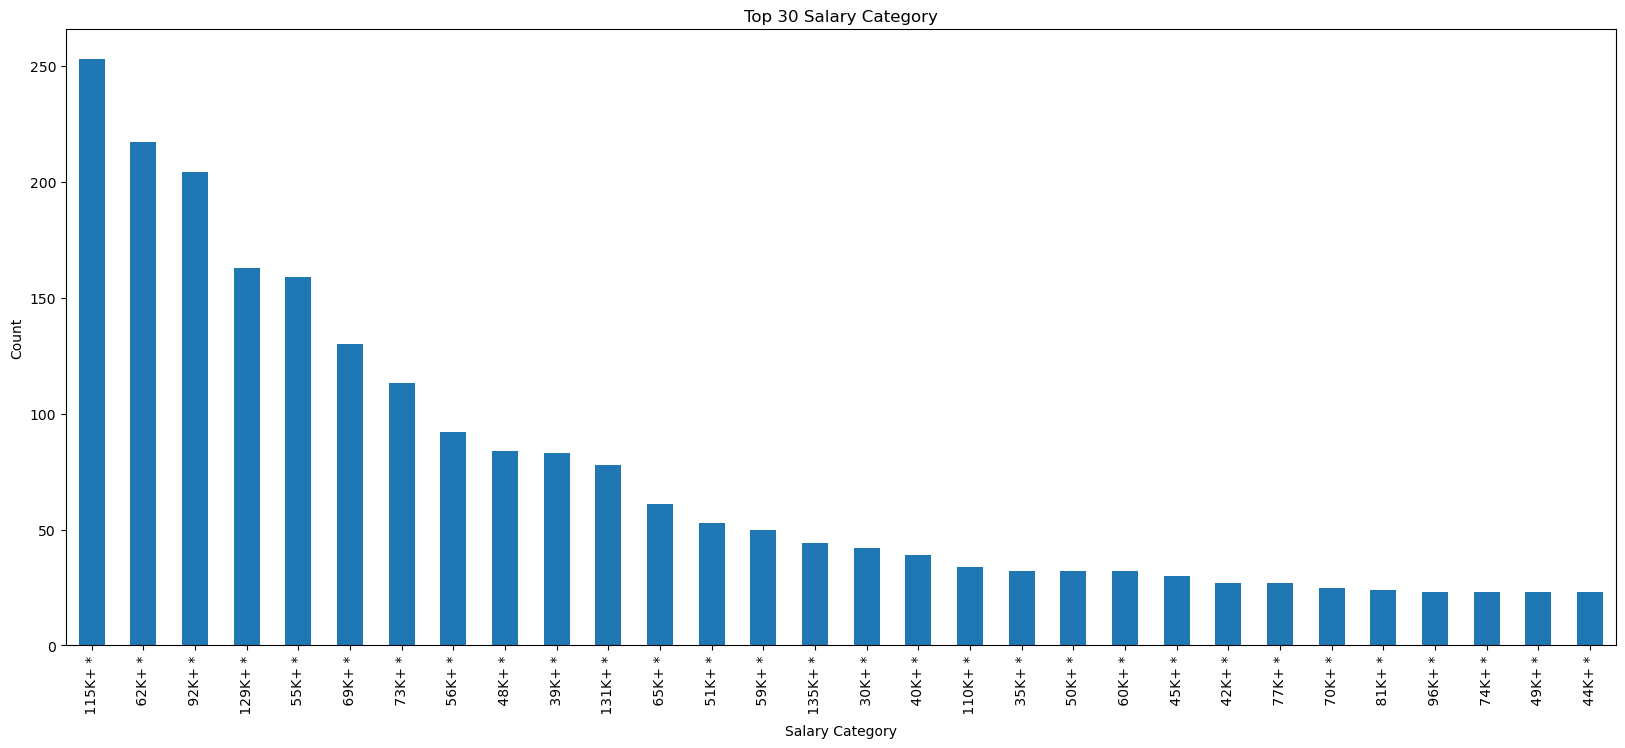

In [28]:
location_counts = df['Salary'].value_counts().head(30)

# Plotting the bar graph
plt.figure(figsize=(20,8))
location_counts.plot(kind='bar')
plt.title('Top 30 Salary Category')
plt.xlabel('Salary Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [29]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [30]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

# Assuming your dataset is stored in a DataFrame called 'df'
# Replace 'Requirement of the company' with the actual column name in your dataset

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [31]:
df1.head()

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48K+ *,"Computer Science,Data quality,Genetics,Mathema...",",,,,"
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48K+ *,"Agile,Data management,Finance,Security,,",",,,,"
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48K+ *,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,"
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108K+,"AWS,Azure,Computer Science,Consulting,Dataflow...","Flex hours,Flex vacation,Parental leave,Unlimi..."
5,ServiceNow,Sr Staff Data Scientist - ATG,"Kirkland, Washington, United States",Full Time,Senior-level,184K+,"Computer Science,Deep Learning,Industrial,Mach...","401(k) matching,Career development,Competitive..."


In [32]:
df1['Facilities']

0                                                    ,,,,
1                                                    ,,,,
3                                                    ,,,,
4       Flex hours,Flex vacation,Parental leave,Unlimi...
5       401(k) matching,Career development,Competitive...
                              ...                        
3190    401(k) matching,Career development,Flex hours,...
3191                    Career development,Health care,,,
3192    401(k) matching,Career development,Equity,Insu...
3193                               Career development,,,,
3196            Career development,Startup environment,,,
Name: Facilities, Length: 2600, dtype: object

In [33]:
# requirements = df['Requirement of the company']

# # Create a tokenizer object
# tokenizer = Tokenizer()

# # Fit the tokenizer on the requirements text
# tokenizer.fit_on_texts(requirements)

# # Tokenize the text
# tokenized_requirements = tokenizer.texts_to_sequences(requirements)

# # Print the tokenized requirements
# for i, tokens in enumerate(tokenized_requirements):
#     print(f"Requirement {i+1} tokens: {tokens}")

## Expanding Facilities columns in 5 columns

In [34]:
new_df = df.Facilities.str.split(",",expand=True)

In [35]:
new_df.head()

,0,1,2,3,4
0,,,,,
1,,,,,
2,Career development,,,,
3,,,,,
4,Flex hours,Flex vacation,Parental leave,Unlimited paid time off,


## Renaming (Requirements of the company) to (Requirements) and then expanding Requirements column to 6 columns 

In [36]:
df.columns = ['Company', 'Job Title', 'Location', 'Job Type', 'Experience level', 'Salary', 'Requirements', 'Facilities']

# Print the updated DataFrame
df.head()

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirements,Facilities
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48K+ *,"Computer Science,Data quality,Genetics,Mathema...",",,,,"
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48K+ *,"Agile,Data management,Finance,Security,,",",,,,"
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,NaN,90K+ *,"Agile,Architecture,AWS,Computer Science,Comput...","Career development,,,,"
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48K+ *,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,"
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108K+,"AWS,Azure,Computer Science,Consulting,Dataflow...","Flex hours,Flex vacation,Parental leave,Unlimi..."


In [37]:
df1 = df.Requirements.str.split(",",expand=True)

In [38]:
df1.head()

,0,1,2,3,4,5
0,Computer Science,Data quality,Genetics,Mathematics,SAS,Statistics
1,Agile,Data management,Finance,Security,,
2,Agile,Architecture,AWS,Computer Science,Computer Vision,Deep Learning
3,Engineering,Industrial,Oracle,Power BI,R,R&D
4,AWS,Azure,Computer Science,Consulting,Dataflow,Data pipelines


 ## Next task is to use NLP techniques to analyse the data for future analysis